In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

# Plot settings (optional)
plt.rcParams["figure.figsize"] = (10, 5)

DB_CONFIG = {
    "host": "localhost",
    "port": 5432,
    "dbname": "ecommerce_warehouse",
    "user": "postgres",
    "password": "Chowieman",  # <- update this
}

def get_connection():
    return psycopg2.connect(**DB_CONFIG)

def run_query(sql, params=None):
    with get_connection() as conn:
        return pd.read_sql(sql, conn, params=params)

C:\Users\riley\AppData\Local\Temp\ipykernel_8444\58184792.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn, params=params)


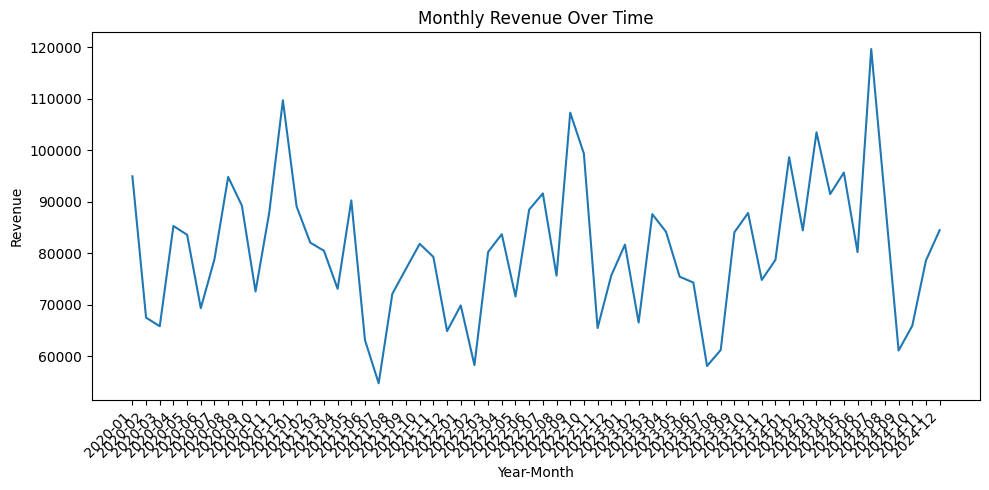

In [2]:
rev_time_query = """
SELECT
    year,
    month,
    SUM(total_revenue) AS total_revenue
FROM vw_daily_revenue
GROUP BY year, month
ORDER BY year, month;
"""

rev_time = run_query(rev_time_query)
rev_time["year_month"] = rev_time["year"].astype(str) + "-" + rev_time["month"].astype(str).str.zfill(2)

plt.plot(rev_time["year_month"], rev_time["total_revenue"])
plt.xticks(rotation=45, ha="right")
plt.title("Monthly Revenue Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [3]:
rev_channel_query = """
SELECT
    channel_name,
    SUM(total_revenue) AS revenue
FROM vw_revenue_by_channel
GROUP BY channel_name
ORDER BY revenue DESC;
"""

rev_channel = run_query(rev_channel_query)
rev_channel


C:\Users\riley\AppData\Local\Temp\ipykernel_8444\58184792.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn, params=params)


,channel_name,revenue
0,Social,665977.83
1,Paid Social,655778.91
2,Display Ads,629097.11
3,Paid Search,626976.58
4,Direct,608935.88
5,Organic Search,581924.79
6,Referral,547748.83
7,Email,526753.02


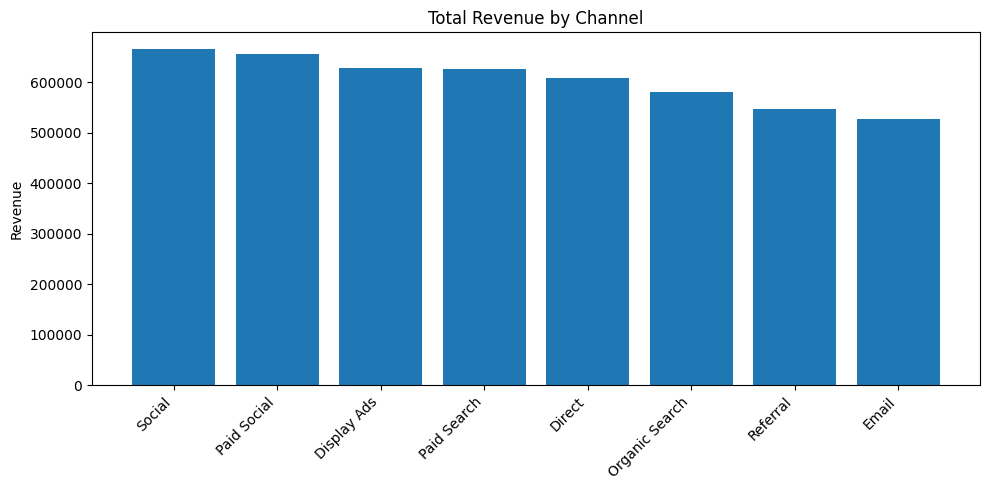

In [4]:
plt.bar(rev_channel["channel_name"], rev_channel["revenue"])
plt.xticks(rotation=45, ha="right")
plt.title("Total Revenue by Channel")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [5]:
ltv_seg_query = """
SELECT
    ltv_segment,
    COUNT(*) AS customers,
    ROUND(AVG(total_revenue), 2) AS avg_revenue,
    ROUND(SUM(total_revenue), 2) AS total_revenue
FROM vw_customer_ltv_segments
GROUP BY ltv_segment
ORDER BY total_revenue DESC;
"""

ltv_seg = run_query(ltv_seg_query)
ltv_seg


C:\Users\riley\AppData\Local\Temp\ipykernel_8444\58184792.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn, params=params)


,ltv_segment,customers,avg_revenue,total_revenue
0,Platinum,124,16214.98,2010656.96
1,Gold,125,10788.18,1348522.38
2,Silver,125,7612.96,951620.38
3,Bronze,125,4259.15,532393.23


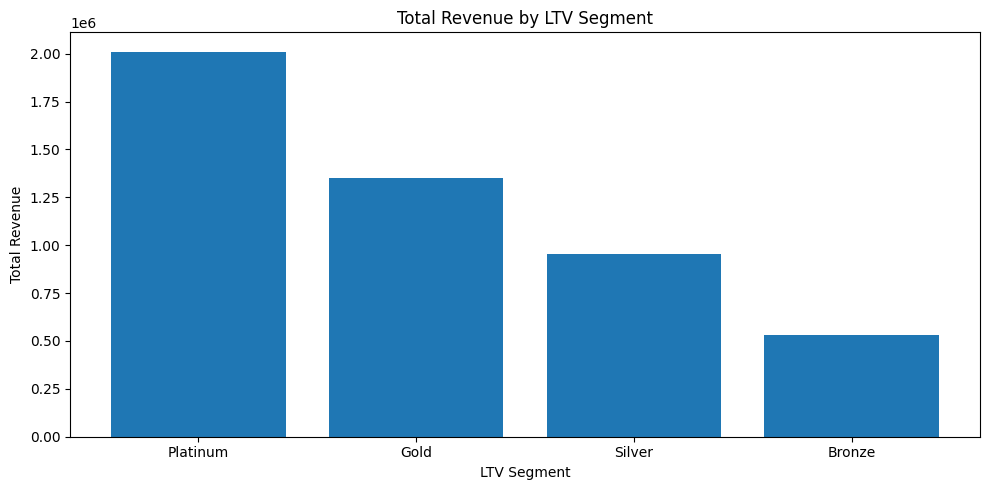

In [6]:
plt.bar(ltv_seg["ltv_segment"], ltv_seg["total_revenue"])
plt.title("Total Revenue by LTV Segment")
plt.xlabel("LTV Segment")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


In [7]:
rfm_top_query = """
SELECT
    customer_key,
    first_name,
    last_name,
    segment,
    recency_days,
    frequency,
    monetary_value,
    recency_score,
    frequency_score,
    monetary_score,
    rfm_score,
    rfm_code
FROM vw_customer_rfm_scores
ORDER BY rfm_score DESC, monetary_value DESC
LIMIT 20;
"""

rfm_top = run_query(rfm_top_query)
rfm_top


C:\Users\riley\AppData\Local\Temp\ipykernel_8444\58184792.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn, params=params)


,customer_key,first_name,last_name,segment,recency_days,frequency,monetary_value,recency_score,frequency_score,monetary_score,rfm_score,rfm_code
0,CUST-00269,Shirley,Hall,Employee,1183,3,5481.42,5,5,5,555,555
1,CUST-00141,Ruth,Barry,Retail,594,2,5428.85,5,5,5,555,555
2,CUST-00283,William,Berger,Employee,738,3,5334.55,5,5,5,555,555
3,CUST-00109,Nathan,Hickman,Retail,973,2,5297.76,5,5,5,555,555
4,CUST-00009,Joseph,Gibson,Employee,656,4,5251.85,5,5,5,555,555
5,CUST-00039,David,Fowler,Wholesale,812,3,5193.16,5,5,5,555,555
6,CUST-00016,Dwayne,Walker,Retail,1196,2,5166.84,5,5,5,555,555
7,CUST-00059,Jennifer,Powell,Employee,721,2,4689.40,5,5,5,555,555
8,CUST-00034,Michael,Evans,Retail,514,3,4633.74,5,5,5,555,555
9,CUST-00327,Allison,Duffy,Retail,841,3,4502.04,5,5,5,555,555


C:\Users\riley\AppData\Local\Temp\ipykernel_8444\58184792.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn, params=params)


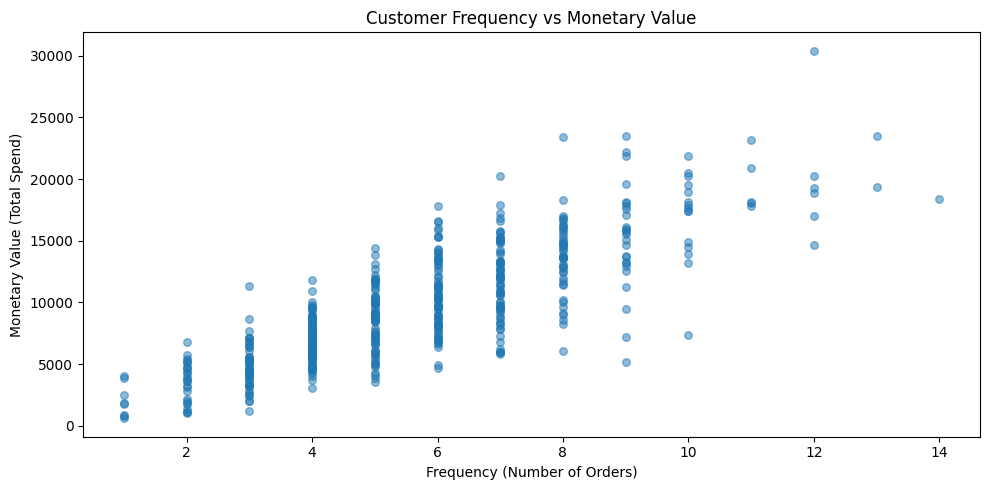

In [8]:
rfm_all_query = """
SELECT
    frequency,
    monetary_value,
    recency_days
FROM vw_customer_rfm_scores;
"""

rfm_all = run_query(rfm_all_query)

plt.scatter(
    rfm_all["frequency"],
    rfm_all["monetary_value"],
    s=30,
    alpha=0.5,
)
plt.xlabel("Frequency (Number of Orders)")
plt.ylabel("Monetary Value (Total Spend)")
plt.title("Customer Frequency vs Monetary Value")
plt.tight_layout()
plt.show()


In [9]:
cohort_query = """
SELECT
    cohort_month,
    months_since_cohort_start,
    retention_percent
FROM vw_cohort_retention
ORDER BY cohort_month, months_since_cohort_start;
"""

cohort = run_query(cohort_query)
cohort.head()


C:\Users\riley\AppData\Local\Temp\ipykernel_8444\58184792.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn, params=params)


,cohort_month,months_since_cohort_start,retention_percent
0,2020-01-01,0,100.00
1,2020-01-01,1,10.20
2,2020-01-01,2,6.12
3,2020-01-01,3,8.16
4,2020-01-01,4,6.12


In [10]:
cohort_pivot = cohort.pivot_table(
    index="cohort_month",
    columns="months_since_cohort_start",
    values="retention_percent"
).fillna(0)

cohort_pivot


months_since_cohort_start,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
cohort_month,,,,,,,,,,,,,,,,,,,,,
2020-01-01,100.0,10.20,6.12,8.16,6.12,6.12,14.29,10.20,12.24,8.16,...,12.24,8.16,6.12,8.16,14.29,4.08,6.12,4.08,4.08,12.24
2020-02-01,100.0,15.15,9.09,9.09,6.06,12.12,9.09,15.15,6.06,9.09,...,6.06,12.12,9.09,6.06,15.15,6.06,6.06,3.03,12.12,0.00
2020-03-01,100.0,14.81,3.70,3.70,7.41,3.70,3.70,11.11,14.81,11.11,...,7.41,18.52,11.11,7.41,7.41,14.81,3.70,7.41,0.00,0.00
2020-04-01,100.0,0.00,6.90,17.24,17.24,6.90,3.45,17.24,3.45,3.45,...,17.24,13.79,6.90,6.90,10.34,10.34,3.45,0.00,0.00,0.00
2020-05-01,100.0,8.33,2.78,13.89,5.56,0.00,8.33,11.11,8.33,11.11,...,19.44,13.89,5.56,2.78,11.11,13.89,0.00,0.00,0.00,0.00
2020-06-01,100.0,4.00,4.00,8.00,12.00,0.00,0.00,8.00,12.00,20.00,...,8.00,16.00,8.00,4.00,8.00,0.00,0.00,0.00,0.00,0.00
2020-07-01,100.0,7.69,19.23,7.69,11.54,7.69,7.69,3.85,0.00,11.54,...,19.23,3.85,7.69,19.23,0.00,0.00,0.00,0.00,0.00,0.00
2020-08-01,100.0,5.71,2.86,8.57,14.29,0.00,5.71,11.43,17.14,11.43,...,2.86,14.29,8.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,100.0,8.70,8.70,17.39,4.35,17.39,4.35,0.00,8.70,0.00,...,8.70,4.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


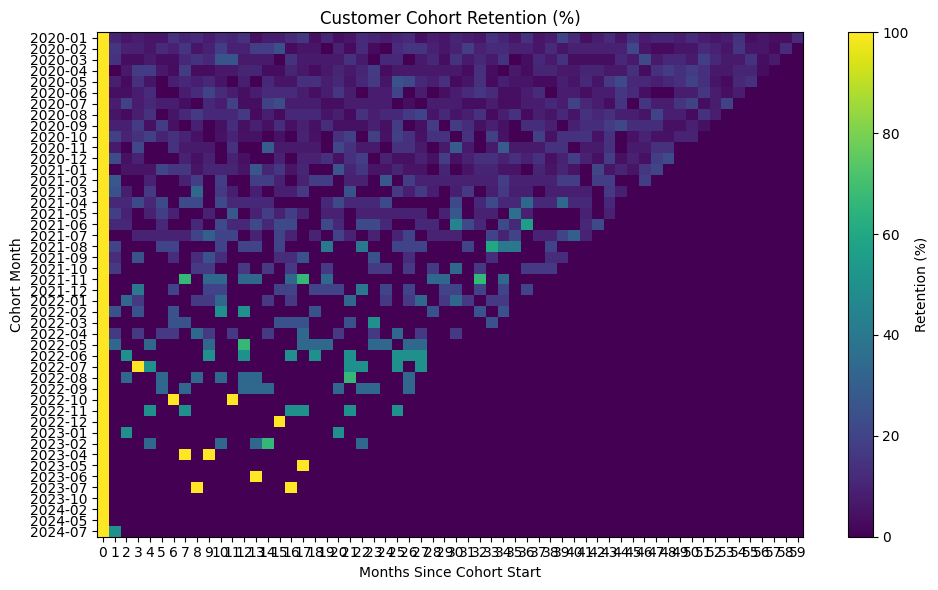

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(cohort_pivot.values, aspect="auto")
plt.colorbar(label="Retention (%)")

plt.xticks(
    range(cohort_pivot.shape[1]),
    cohort_pivot.columns,
)
plt.yticks(
    range(cohort_pivot.shape[0]),
    [d.strftime("%Y-%m") for d in cohort_pivot.index]
)

plt.xlabel("Months Since Cohort Start")
plt.ylabel("Cohort Month")
plt.title("Customer Cohort Retention (%)")
plt.tight_layout()
plt.show()


In [12]:
margin_query = """
SELECT
    year,
    month,
    category,
    subcategory,
    revenue,
    total_cost,
    gross_profit,
    gross_margin_percent
FROM vw_category_margin_monthly
ORDER BY year, month, category, subcategory;
"""

margin = run_query(margin_query)
margin.head()


C:\Users\riley\AppData\Local\Temp\ipykernel_8444\58184792.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn, params=params)


,year,month,category,subcategory,revenue,total_cost,gross_profit,gross_margin_percent
0,2020,1,Electronics,Accessories,5905.03,3801.70,2103.33,35.62
1,2020,1,Electronics,Headphones,4626.26,3460.07,1166.19,25.21
2,2020,1,Electronics,Laptops,3469.39,2680.71,788.68,22.73
3,2020,1,Electronics,Phones,3146.29,2327.52,818.77,26.02
4,2020,1,Fashion,Accessories,3273.80,2707.92,565.88,17.29


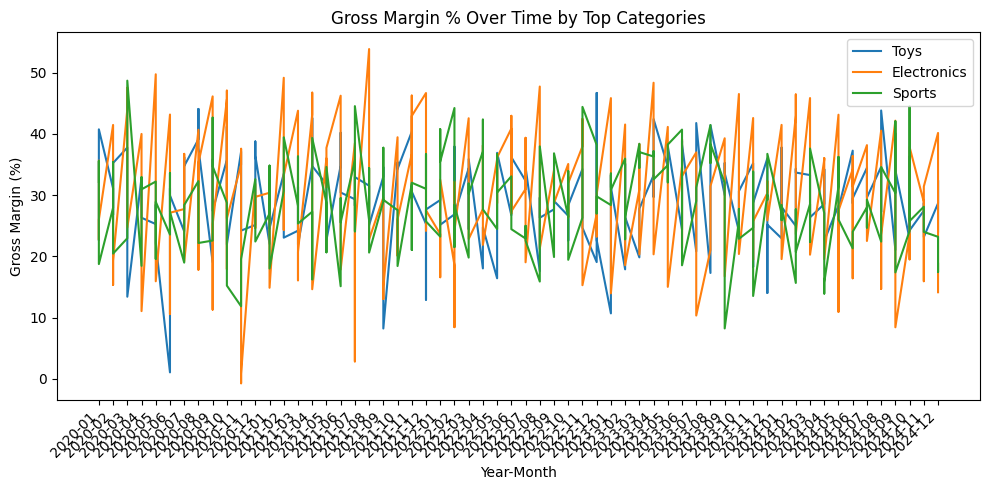

In [13]:
# Pick top 3 categories by total revenue
top_cats = (
    margin.groupby("category")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

margin_top = margin[margin["category"].isin(top_cats)].copy()
margin_top["year_month"] = (
    margin_top["year"].astype(str) + "-" + margin_top["month"].astype(str).str.zfill(2)
)

plt.figure(figsize=(10, 5))
for cat in top_cats:
    cat_data = (
        margin_top[margin_top["category"] == cat]
        .sort_values(["year", "month"])
    )
    plt.plot(cat_data["year_month"], cat_data["gross_margin_percent"], label=cat)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Year-Month")
plt.ylabel("Gross Margin (%)")
plt.title("Gross Margin % Over Time by Top Categories")
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
pairs_query = """
SELECT
    product_name_1,
    product_name_2,
    cooccurrence_orders
FROM vw_product_pairs
ORDER BY cooccurrence_orders DESC
LIMIT 20;
"""

product_pairs = run_query(pairs_query)
product_pairs


C:\Users\riley\AppData\Local\Temp\ipykernel_8444\58184792.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn, params=params)


,product_name_1,product_name_2,cooccurrence_orders
0,Initech Accessories 34,Initech Board Games 185,6
1,Stark Accessories 39,Initech Collectibles 209,6
2,Globex Men 95,Globex Accessories 120,5
3,Globex Collectibles 201,Umbrella Collectibles 214,5


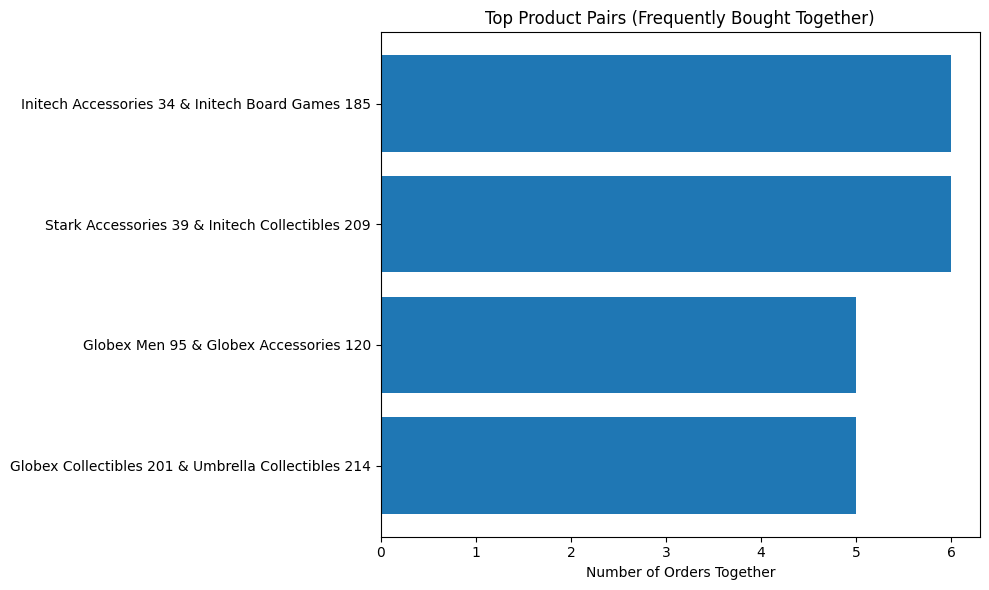

In [15]:
pair_labels = (
    product_pairs["product_name_1"] + " & " + product_pairs["product_name_2"]
)

plt.figure(figsize=(10, 6))
plt.barh(pair_labels, product_pairs["cooccurrence_orders"])
plt.xlabel("Number of Orders Together")
plt.title("Top Product Pairs (Frequently Bought Together)")
plt.gca().invert_yaxis()  # largest at top
plt.tight_layout()
plt.show()
